In [5]:
!pip install opencv-python==3.1.0.4

     |████████████████████████████████| 6.2MB 10.5MB/s 
ERROR: dopamine-rl 1.0.5 has requirement opencv-python>=3.4.1.15, but you'll have opencv-python 3.1.0.4 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [7]:
# To get or download data from internet we use wget (linux command)
!wget https://www.dropbox.com/sh/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa

--2020-11-15 15:07:06--  https://www.dropbox.com/sh/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa [following]
--2020-11-15 15:07:06--  https://www.dropbox.com/sh/raw/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdb8c310d9d781b21c7d4192f60.dl.dropboxusercontent.com/zip_download_get/AmrfP7Po29hgYlrOATGyvJzD8rBoZCX56BgaB38sVum5Q097_gk4sIedsxCbn0Cx7_5aCs5K9R8XGL7JcGX2D-uhLGSAwWbG3QG7Kq2Hg4s4uw [following]
--2020-11-15 15:07:06--  https://ucdb8c310d9d781b21c7d4192f60.dl.dropboxusercontent.com/zip_download_get/AmrfP7Po29hgYlrOATGyvJzD8rBoZCX56BgaB38sVum5Q097_gk4sIedsxCbn0Cx7_5aCs5K9R8XGL7JcGX2D-

In [8]:
# To unzip zip files
!unzip AAA963Q5FMQXHl-XIxxLsDDJa

Archive:  AAA963Q5FMQXHl-XIxxLsDDJa
mapname:  conversion of  failed
 extracting: glasses.png             
 extracting: mustache.png            
 extracting: Nose18x15.xml           
 extracting: Jamie_Before.jpg        
 extracting: frontalEyes35x16.xml    


In [10]:
nose_cascade=cv2.CascadeClassifier("/content/Nose18x15.xml")
eyes_cascade=cv2.CascadeClassifier("/content/frontalEyes35x16.xml")

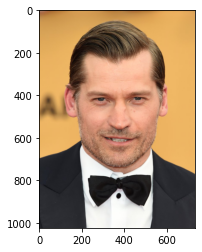

In [11]:
img=plt.imread("/content/Jamie_Before.jpg")
plt.imshow(img)

In [18]:
eye_x,eye_y,eye_w,eye_h=eyes_cascade.detectMultiScale(img,1.5)[0]
nose_x,nose_y,nose_w,nose_h=nose_cascade.detectMultiScale(img,1.5)[0]

In [21]:
img = cv2.rectangle(img, (eye_x, eye_y), (eye_x + eye_w, eye_y + eye_h), (255,255,255), 2 )
img = cv2.rectangle(img, (nose_x, nose_y), (nose_x + nose_w, nose_y + nose_h), (255,255,255), 2 )

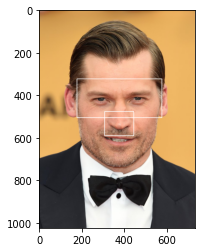

In [22]:
plt.imshow(img)

In [23]:
mustache=plt.imread("/content/mustache.png")
glasses=plt.imread("/content/glasses.png")

In [24]:
glasses.shape

(221, 483, 4)

In [25]:
# The 4th channel is transparency (png) (if >0 then not transparent)

In [26]:
# Resizing the glasses
glasses=cv2.resize(glasses,(eye_w,eye_h))

In [30]:
img=plt.imread("/content/Jamie_Before.jpg")
img=img.copy() # Since the file is a read only file

In [33]:
for i in range(glasses.shape[0]):
  for j in range(glasses.shape[1]):
    if glasses[i,j,3]>0:
      img[eye_y+i,eye_x+j,:]=glasses[i,j,:-1] # jpg ==> rgb, png ==> rgb+transparancy... so to convert the 4 channel img to 3 channel img we remove the transparency part

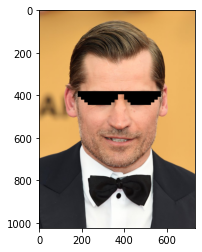

In [34]:
plt.imshow(img)